# Служебные команды для настройки базы данных SQLite

In [1]:
import sqlite3 as sq
import pandas as pd
import numpy as np

In [2]:
# Пути к файлам базы данных в SQLite
file_db = "C:/Users/Dasha/Desktop/DarushkaR/машинки/sakila/sqlite-sakila-db/sakila.db"
file_schema = "C:/Users/Dasha/Desktop/DarushkaR/машинки/sakila/sqlite-sakila-db/sqlite-sakila-schema.sql"
file_insert_data = "C:/Users/Dasha/Desktop/DarushkaR/машинки/sakila/sqlite-sakila-db/sqlite-sakila-insert-data.sql"
file_delete_data = "C:/Users/Dasha/Desktop/DarushkaR/машинки/sakila/sqlite-sakila-db/sqlite-sakila-delete-data.sql"
file_drop_schema = "C:/Users/Dasha/Desktop/DarushkaR/машинки/sakila/sqlite-sakila-db/sqlite-sakila-drop-objects.sql"


with open(file_drop_schema, "r", encoding="UTF-8") as f:
    str_sql_script_drop_schema = f.read()

with open(file_delete_data, "r", encoding="UTF-8") as f:
    str_sql_script_delete_data = f.read()

with open(file_schema, "r", encoding="UTF-8") as f:
    str_sql_script_insert_schema = f.read()

with open(file_insert_data, "r", encoding="UTF-8") as f:
    str_sql_script_insert_data = f.read()
    

# Подключение к базе данных
connection = sq.connect(file_db)
# Место выполнения запросов к базе данных
cur = connection.cursor()

# Создание базы с данными из скриптов
cur.executescript(str_sql_script_delete_data)
cur.executescript(str_sql_script_drop_schema)
cur.executescript(str_sql_script_insert_schema)
cur.executescript(str_sql_script_insert_data)

# **Работа с базами данных в Pandas**

## База данных Sakila

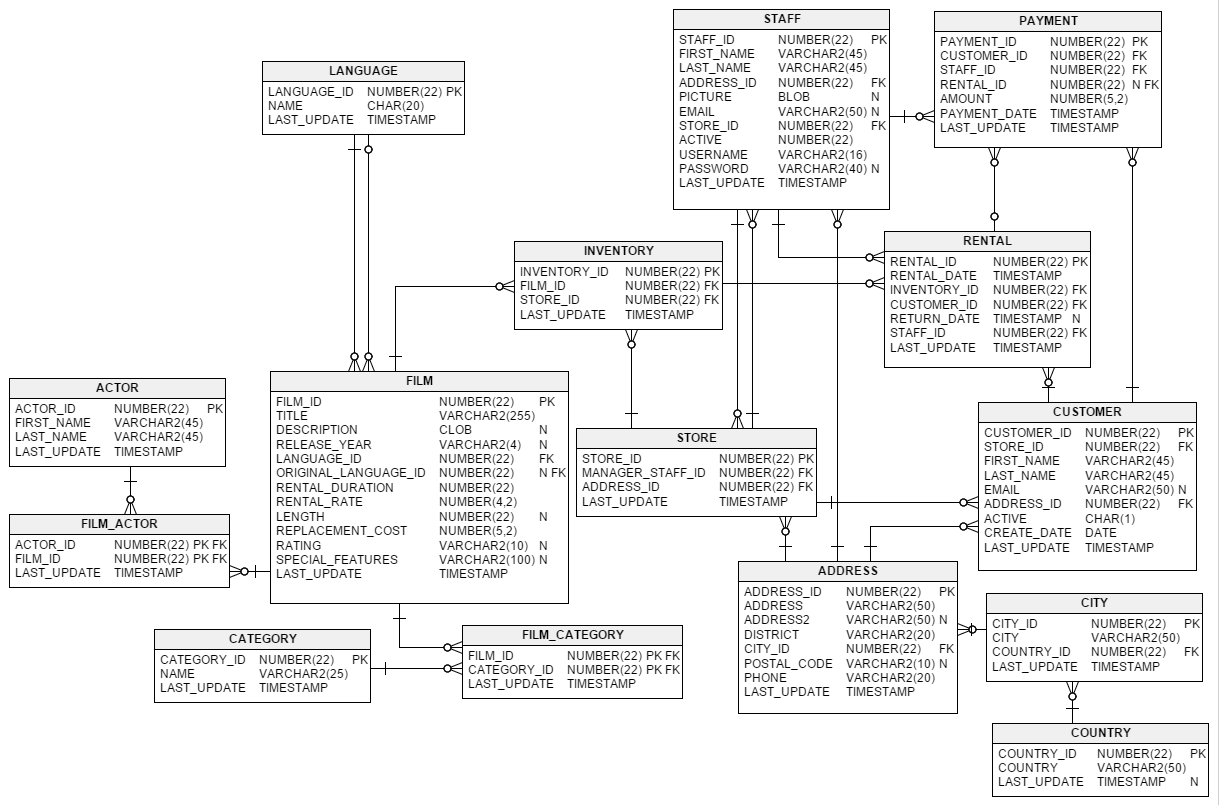

In [3]:
# Подключение к базе данных
file_db = "C:/Users/Dasha/Desktop/DarushkaR/машинки/sakila/sqlite-sakila-db/sakila.db"
conn = sq.connect(file_db)

In [4]:
# Просмотр названий таблиц в SQLITE
sql_query1 = """
    SELECT name, type
    FROM sqlite_master 
    WHERE type='table';
"""

name_table_db = pd.read_sql(sql_query1, conn)

In [5]:
name_table_db

,name,type
0,sqlite_sequence,table
1,actor,table
2,country,table
3,city,table
4,address,table
5,language,table
6,category,table
7,customer,table
8,film,table
9,film_actor,table


In [6]:
# Просмотр структуры таблицы в SQLITE
# cid      name          type     notnull  dflt_value  pk    
table_to_know = "payment"

sql_query2 = f"""
    PRAGMA TABLE_INFO({table_to_know});
"""

pd.read_sql(sql_query2, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,payment_id,int,1,None,1
1,1,customer_id,INT,1,None,0
2,2,staff_id,SMALLINT,1,None,0
3,3,rental_id,INT,0,NULL,0
4,4,amount,"DECIMAL(5,2)",1,None,0
5,5,payment_date,TIMESTAMP,1,None,0
6,6,last_update,TIMESTAMP,1,None,0


## **SQL запрос на выборку данных из таблицы**



## **1. Выведите таблицу актеров с именем ‘Scarlett’**?

In [26]:
pd.read_sql("""
    SELECT *
    FROM actor 
    where LOWER(first_name) Like "Scarlett"
""", conn)


,actor_id,first_name,last_name,last_update
0,81,SCARLETT,DAMON,2022-10-06 12:32:04
1,124,SCARLETT,BENING,2022-10-06 12:32:04


## **2. Выведите таблицу аткеров с фамилией ‘Johansson’**

In [27]:
pd.read_sql("""
    SELECT *
    FROM actor 
    where LOWER(last_name) Like "Johansson"
""", conn)

,actor_id,first_name,last_name,last_update
0,8,MATTHEW,JOHANSSON,2022-10-06 12:32:04
1,64,RAY,JOHANSSON,2022-10-06 12:32:04
2,146,ALBERT,JOHANSSON,2022-10-06 12:32:04


## **3. Какое количество уникальных фамилий актеров присутствует в наборе данных?**

In [28]:
pd.read_sql("""
  SELECT last_name 
  FROM actor
  GROUP BY last_name
""", conn)

,last_name
0,AKROYD
1,ALLEN
2,ASTAIRE
3,BACALL
4,BAILEY
...,...
116,WINSLET
117,WITHERSPOON
118,WOOD
119,WRAY


## **4. Какие фамилии актеров не повторяются?**

In [37]:
pd.read_sql("""
  SELECT last_name
  FROM actor
  GROUP BY last_name
  HAVING COUNT(actor_id)=1 
""", conn)

,last_name
0,ASTAIRE
1,BACALL
2,BALE
3,BALL
4,BARRYMORE
...,...
61,WALKEN
62,WAYNE
63,WILSON
64,WITHERSPOON


## **5. Какие фамилии появляются более одного раза?**

In [30]:
pd.read_sql("""
  SELECT last_name
  FROM actor
  GROUP BY last_name
  HAVING COUNT(actor_id) > 1
""", conn)

,last_name
0,AKROYD
1,ALLEN
2,BAILEY
3,BENING
4,BERRY
5,BOLGER
6,BRODY
7,CAGE
8,CHASE
9,CRAWFORD


## **6. Какой актер появляется в большинстве фильмов?**

In [31]:
pd.read_sql("""
    SELECT t2.first_name AS first_name, 
           t2.last_name AS last_name,
           COUNT(t2.film_id) AS cnt
    FROM (SELECT *
          FROM actor
          LEFT JOIN film_actor t1 USING(actor_id)) t2
       GROUP BY t2.actor_id 
       ORDER BY cnt DESC
       LIMIT 1;
""", conn)

,first_name,last_name,cnt
0,GINA,DEGENERES,42


## **7. Доступна ли ‘Academy Dinosaur’ для проката из Store 1?**

In [32]:
pd.read_sql("""
    SELECT t2.store_id,
        t2.title
    FROM (SELECT *
          FROM inventory
          LEFT JOIN film t1 USING(film_id)) t2
    WHERE title="ACADEMY DINOSAUR" AND store_id = 1
""", conn)

,store_id,title
0,1,ACADEMY DINOSAUR
1,1,ACADEMY DINOSAUR
2,1,ACADEMY DINOSAUR
3,1,ACADEMY DINOSAUR


## **8. Когда выйдет ‘Academy Dinosaur’?**

In [33]:
pd.read_sql("""
    SELECT release_year
    FROM film
    WHERE title="ACADEMY DINOSAUR"
""", conn)

,release_year
0,2006


## **9. Какова средняя продолжительность всех фильмов в sakila DB?**

In [34]:
pd.read_sql("""
    SELECT 
        AVG(length) AS LNG
    FROM film
""", conn)

,LNG
0,115.272


## **10. Какова средняя продолжительность фильмов по категориям?**

In [38]:
pd.read_sql("""
        SELECT AVG(length), name
        FROM (SELECT *
                FROM film_category t1
                LEFT JOIN film AS fc ON t1.film_id=fc.film_id) t2
        LEFT JOIN category AS cat ON t2.category_id=cat.category_id
        GROUP BY name
""", conn)

,AVG(length),name
0,111.609375,Action
1,111.015152,Animation
2,109.800000,Children
3,111.666667,Classics
4,115.827586,Comedy
5,108.750000,Documentary
6,120.838710,Drama
7,114.782609,Family
8,121.698630,Foreign
9,127.836066,Games
